In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Create figures folder
os.makedirs('../reports/figures', exist_ok=True)

# Load the localized dataset
df = pd.read_csv('../data/Crop_recommendation_ethiopia.csv')

print("Dataset shape:", df.shape)
print("\nClasses:", df['label'].unique())
print("\nClass distribution:\n", df['label'].value_counts())

Dataset shape: (3550, 8)

Classes: ['rice' 'maize' 'chickpea' 'lentil' 'banana' 'mango' 'watermelon' 'orange'
 'cotton' 'coffee' 'teff' 'sorghum' 'barley' 'enset' 'wheat' 'faba_bean'
 'haricot_bean' 'field_pea' 'sesame' 'noug' 'linseed' 'groundnut' 'potato'
 'sweet_potato' 'cassava' 'khat' 'sugarcane']

Class distribution:
 label
teff            150
linseed         150
noug            150
sesame          150
field_pea       150
haricot_bean    150
faba_bean       150
wheat           150
enset           150
barley          150
sorghum         150
sweet_potato    150
cassava         150
groundnut       150
potato          150
khat            150
sugarcane       150
coffee          100
cotton          100
rice            100
maize           100
orange          100
watermelon      100
banana          100
mango           100
lentil          100
chickpea        100
Name: count, dtype: int64


/tmp/ipykernel_35255/1111685492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y='label',order=df['label'].value_counts().index, palette='viridis')


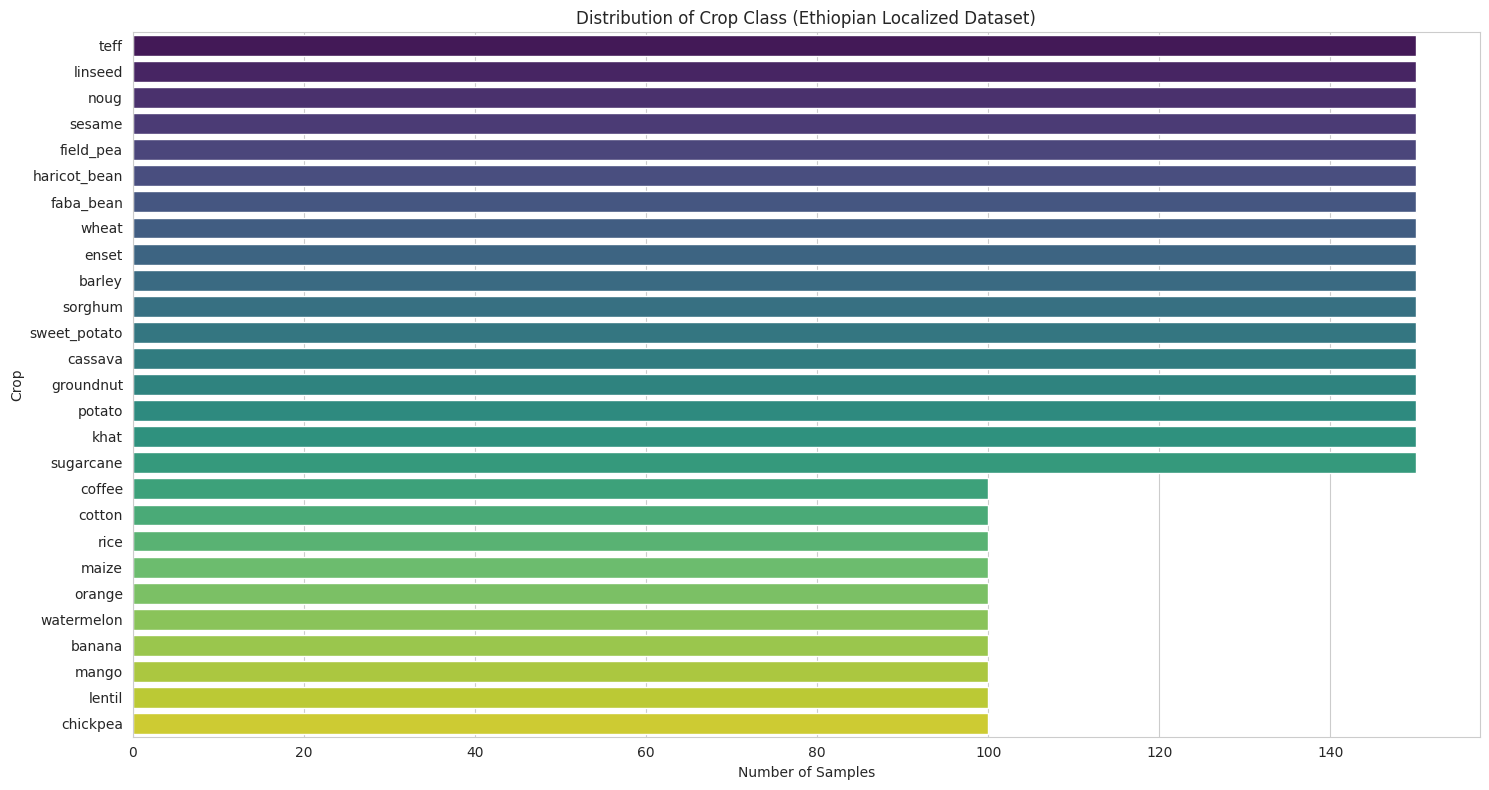

In [4]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,y='label',order=df['label'].value_counts().index, palette='viridis')
plt.title('Distribution of Crop Class (Ethiopian Localized Dataset)')
plt.xlabel("Number of Samples")
plt.ylabel("Crop")
plt.tight_layout()
plt.savefig('../reports/figures/class_distribution.png')
plt.show()

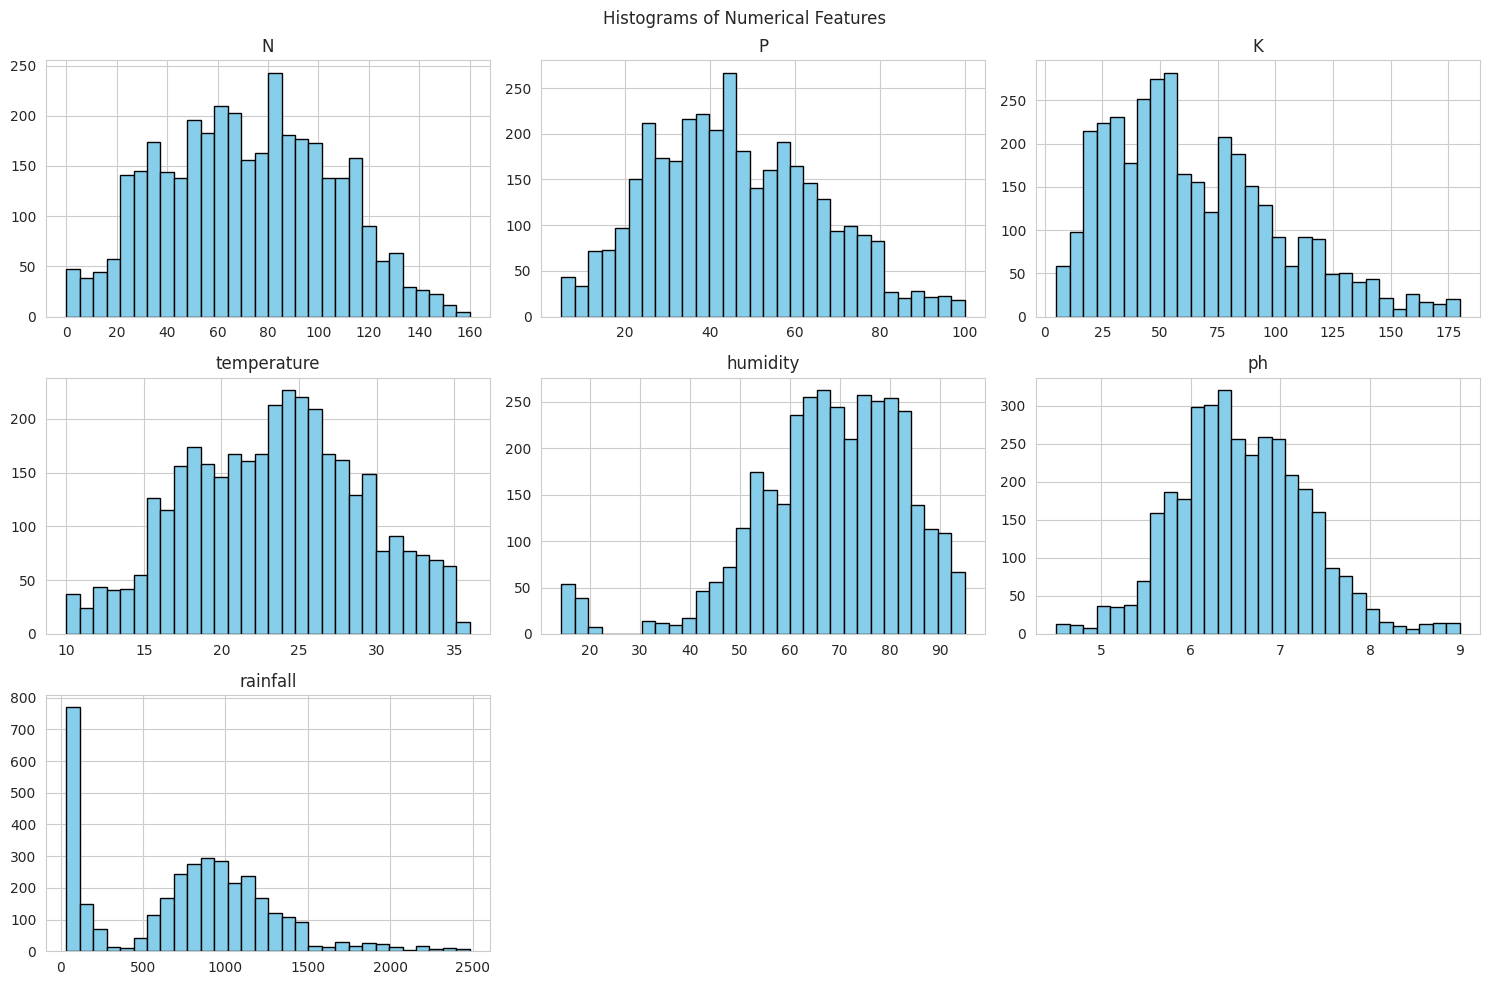

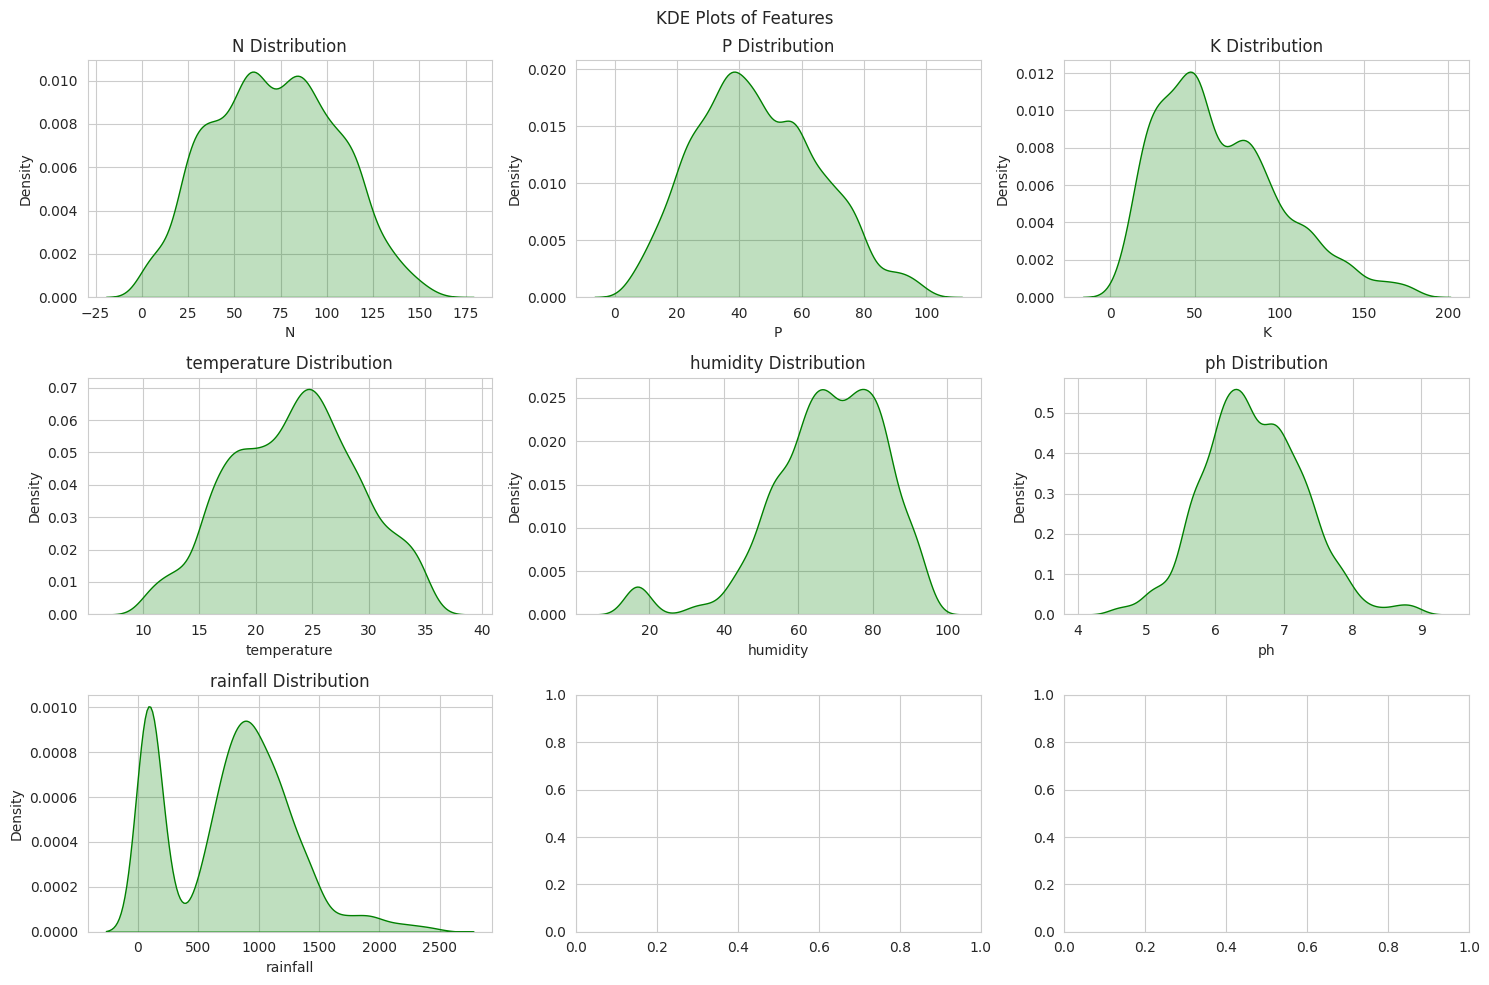

In [11]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

df[features].hist(bins=30, figsize=(15, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.savefig('../reports/figures/feature_histograms.png')
plt.show()

# Overlay KDE for better distribution view
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, feat in enumerate(features):
    sns.kdeplot(df[feat], ax=axes[i], fill=True, color='green')
    axes[i].set_title(f'{feat} Distribution')
plt.suptitle('KDE Plots of Features')
plt.tight_layout()
plt.savefig('../reports/figures/feature_kde.png')
plt.show()

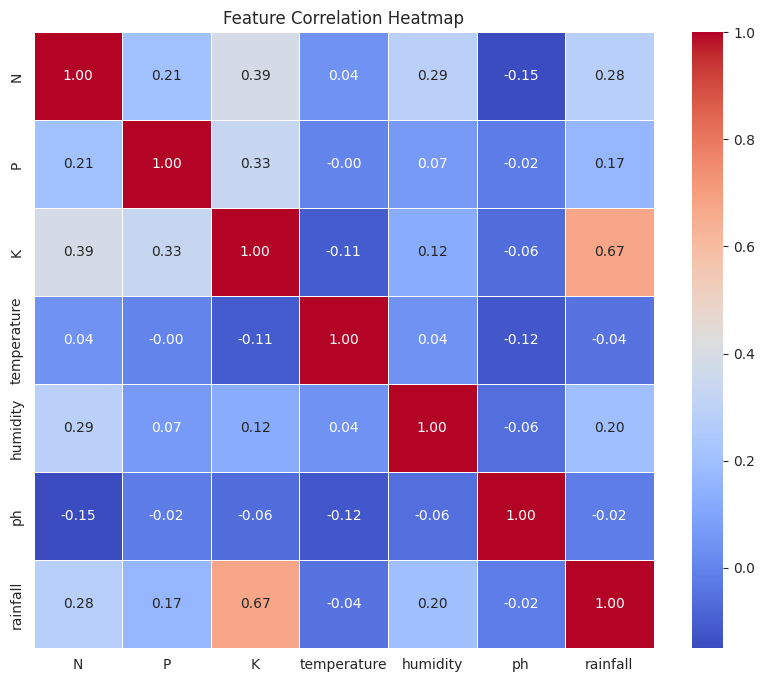

In [13]:
plt.figure(figsize=(10,8))
corr=df[features].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig('../reports/figures/correlation_heatmap.png')
plt.show()

/tmp/ipykernel_35255/1670175321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='temperature', y='label', palette='Set3')


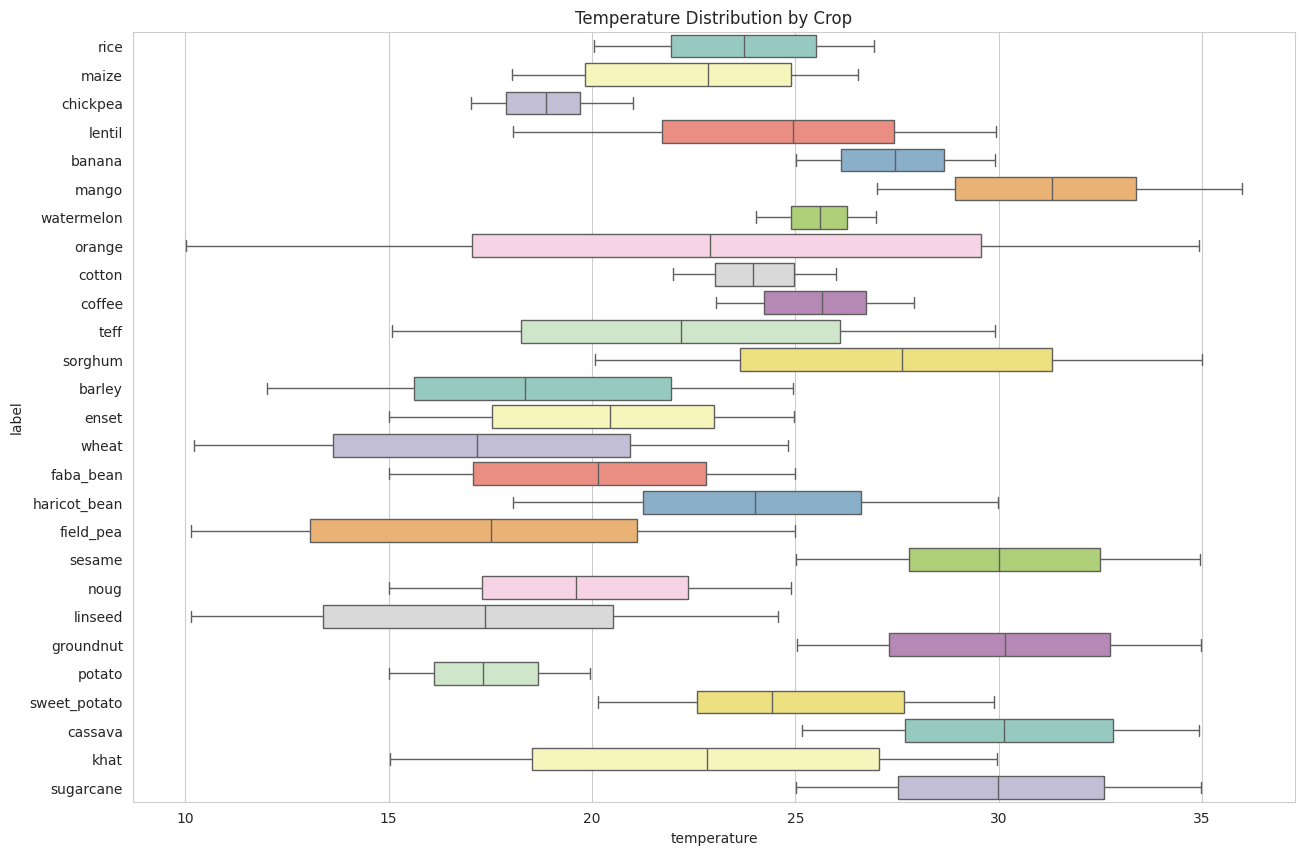

/tmp/ipykernel_35255/1670175321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rainfall', y='label', palette='Set3')


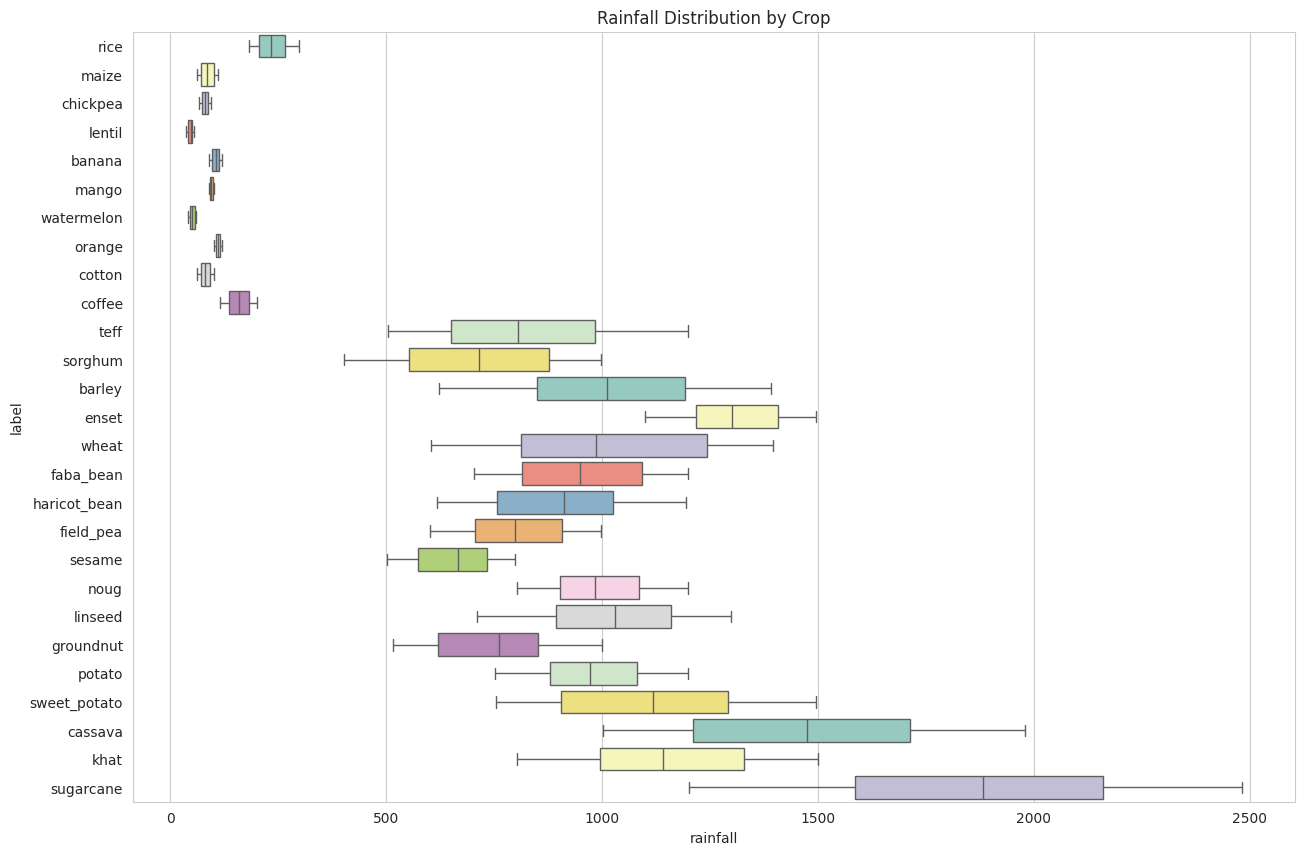

/tmp/ipykernel_35255/1670175321.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ph', y='label', palette='Set3')


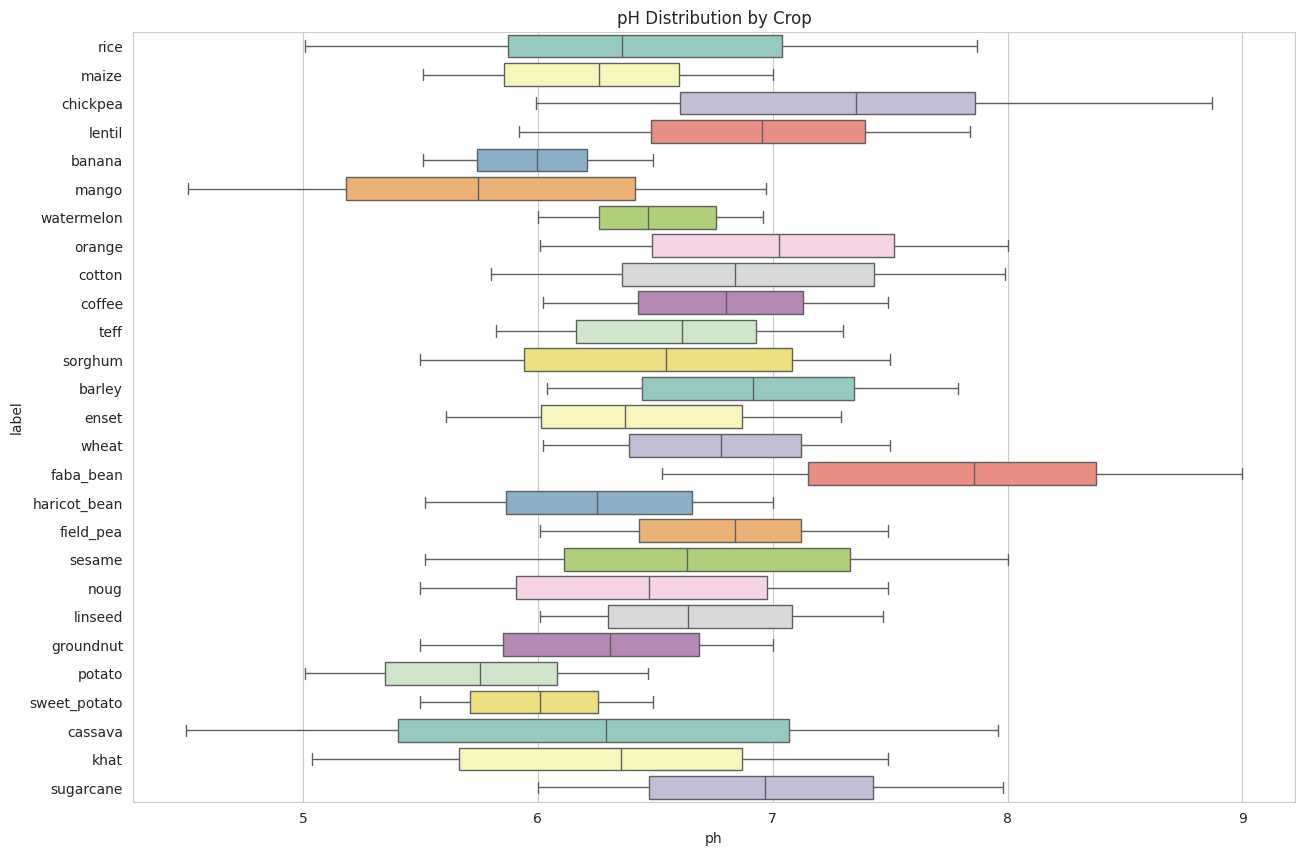

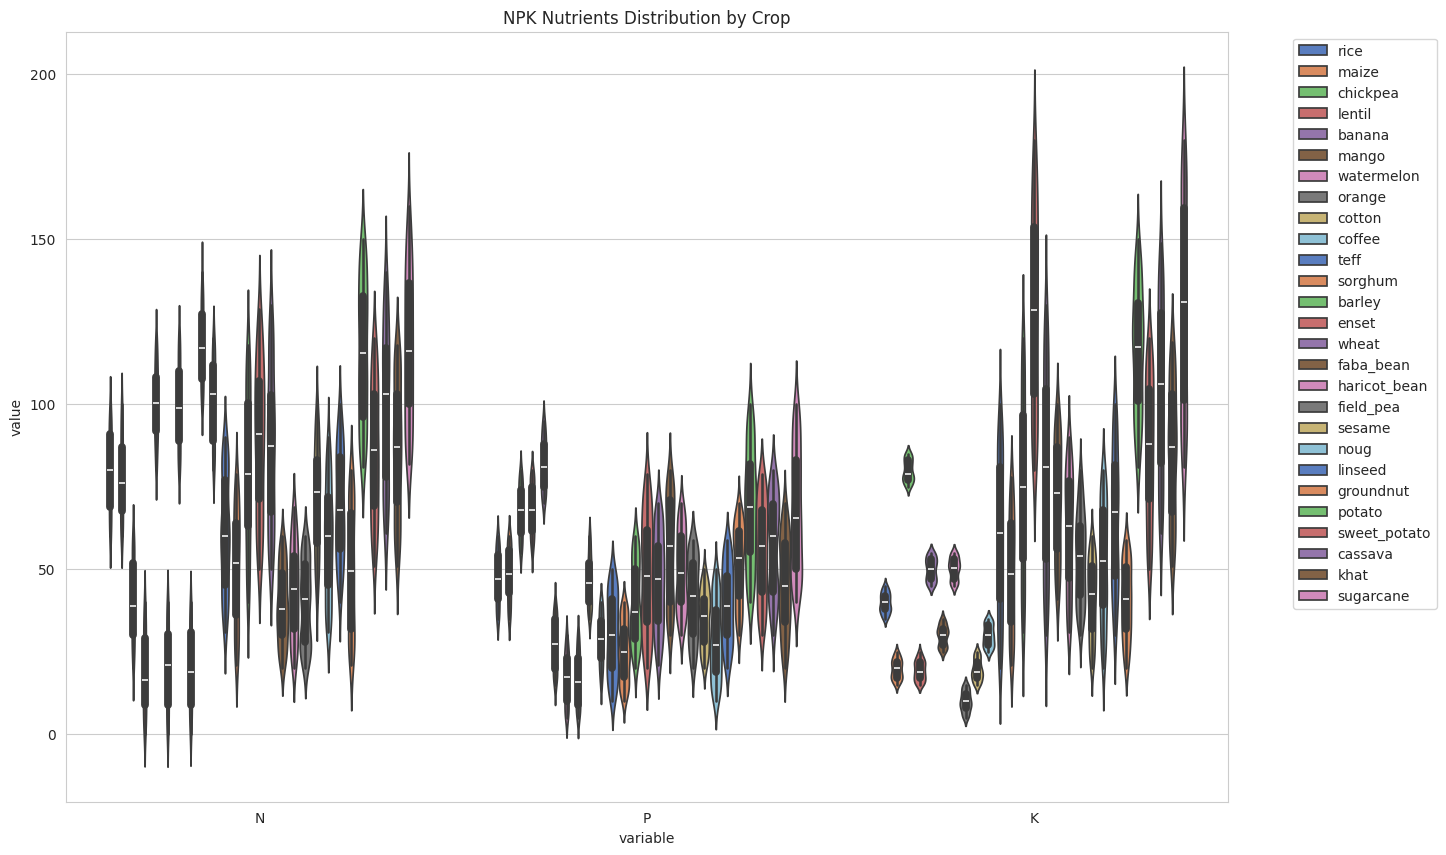

In [14]:
# Temperature by Crop (highland vs lowland separation)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='temperature', y='label', palette='Set3')
plt.title('Temperature Distribution by Crop')
plt.savefig('../reports/figures/temp_by_crop.png')
plt.show()

# Rainfall by Crop
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='rainfall', y='label', palette='Set3')
plt.title('Rainfall Distribution by Crop')
plt.savefig('../reports/figures/rainfall_by_crop.png')
plt.show()

# pH by Crop
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='ph', y='label', palette='Set3')
plt.title('pH Distribution by Crop')
plt.savefig('../reports/figures/ph_by_crop.png')
plt.show()

# NPK (can do violin for variety)
plt.figure(figsize=(15, 10))
sns.violinplot(data=df.melt(id_vars='label', value_vars=['N','P','K']), 
               x='variable', y='value', hue='label', palette='muted')
plt.title('NPK Nutrients Distribution by Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../reports/figures/npk_violin.png')
plt.show()

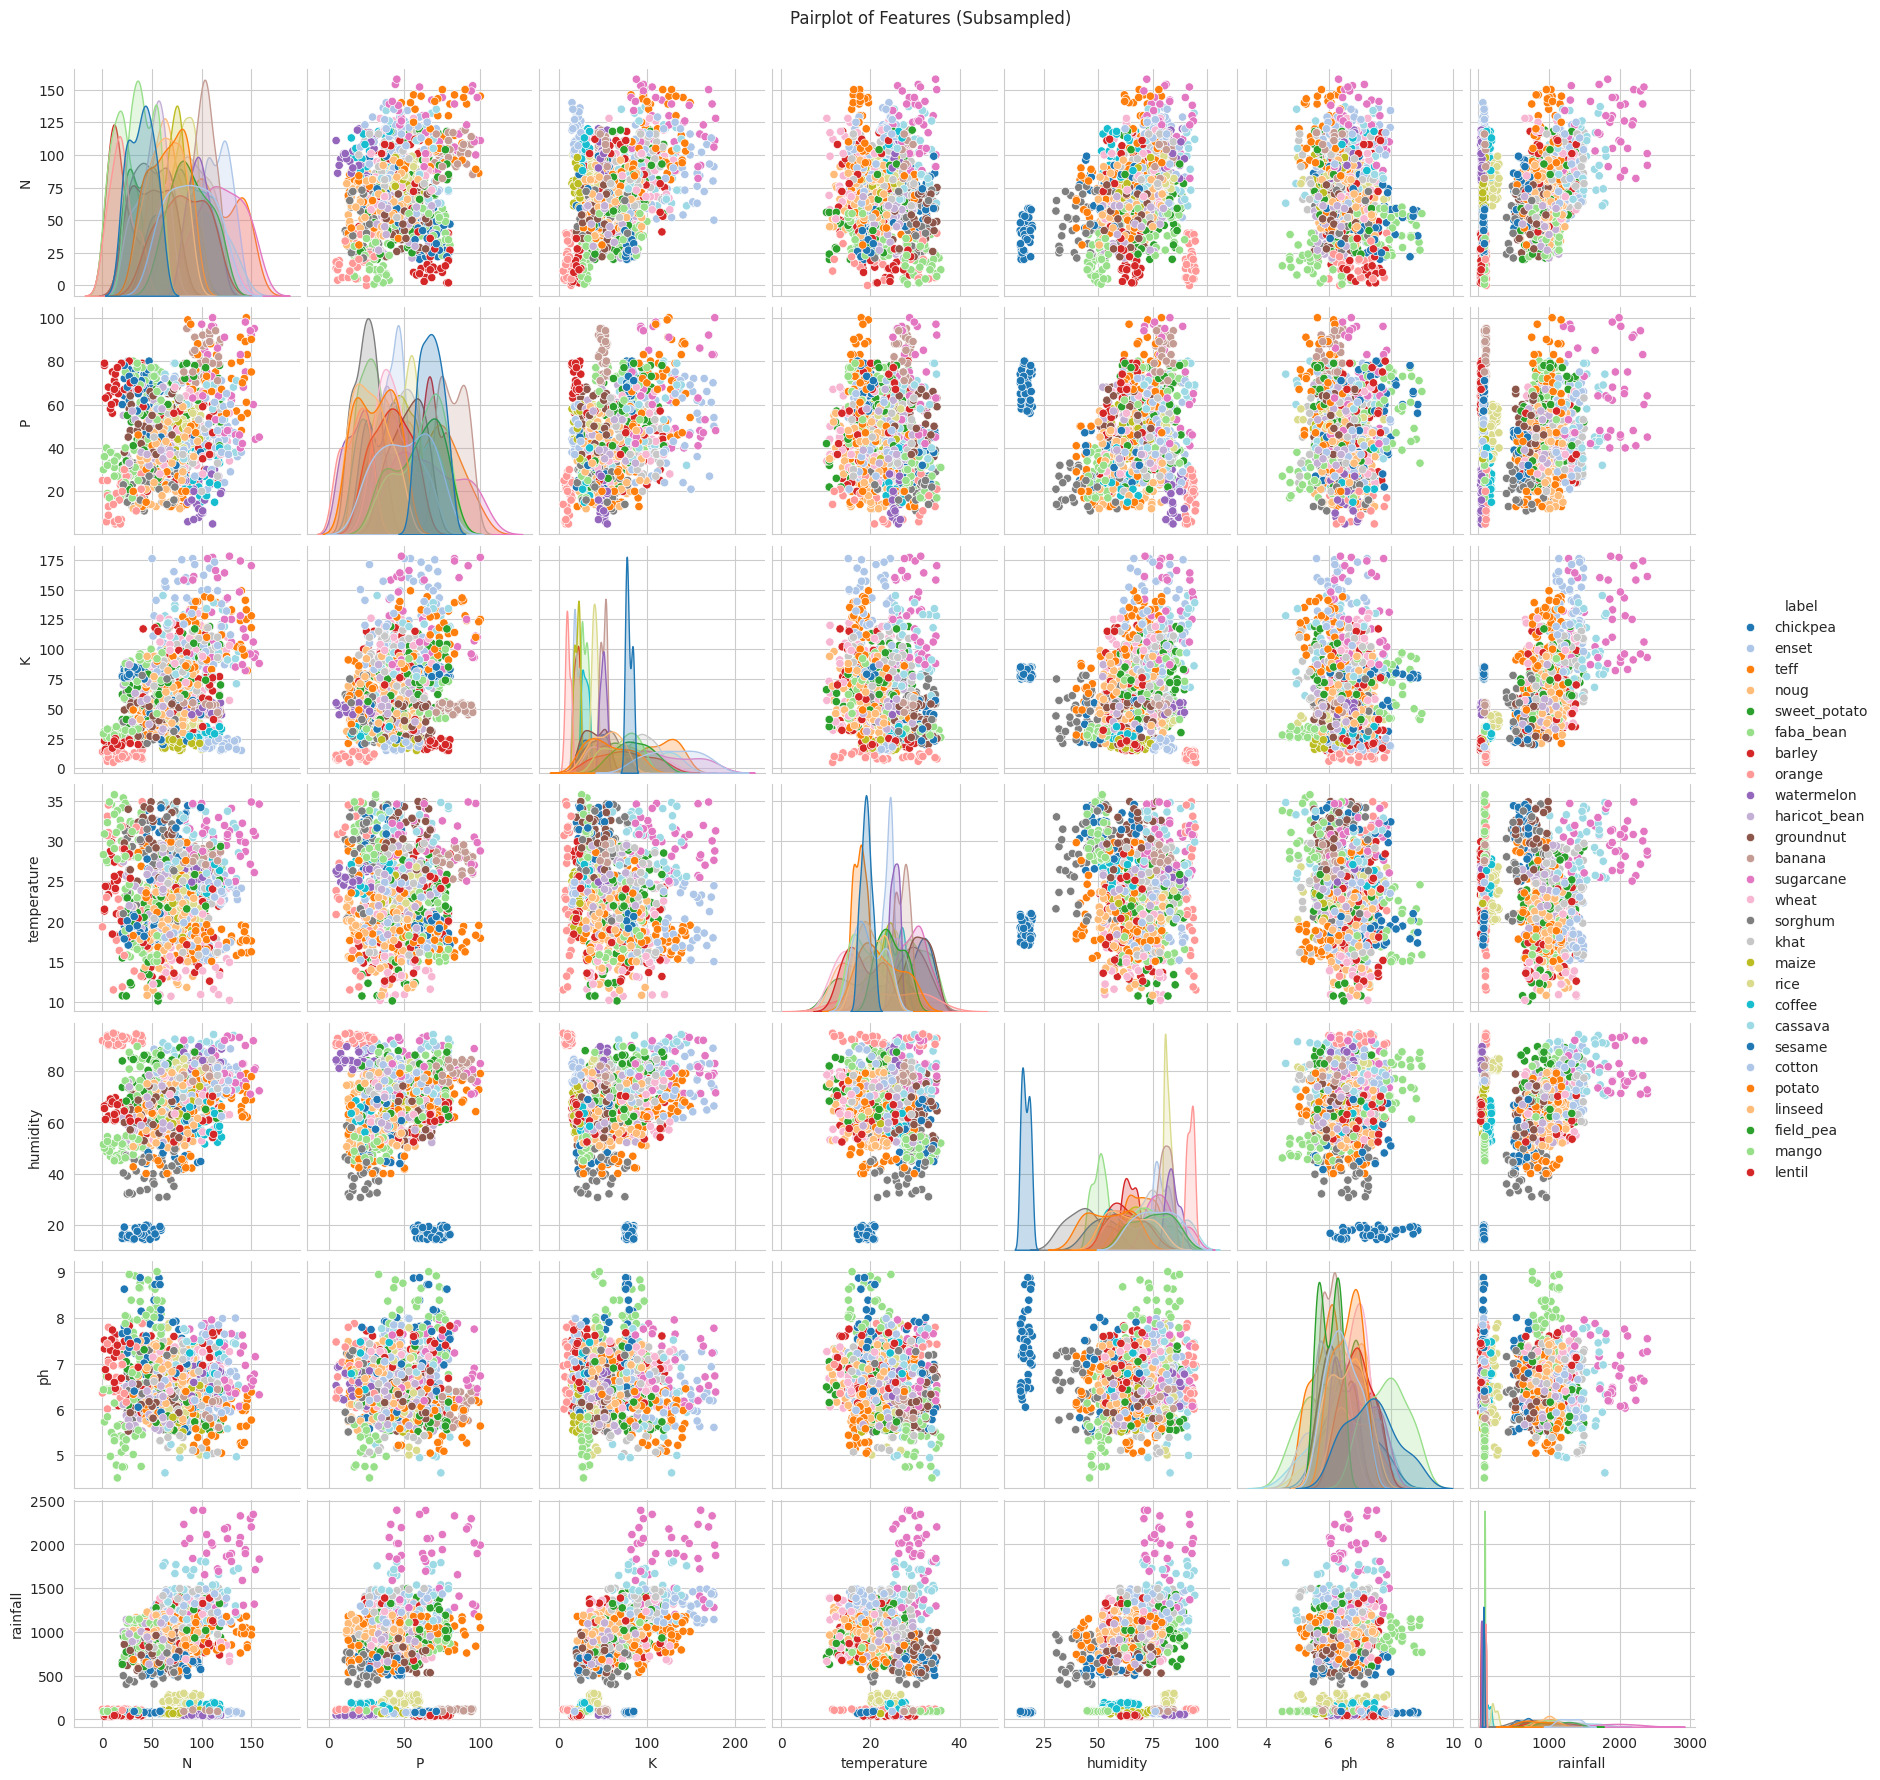

In [15]:
# Subsample for speed (or select key crops/features)
sample_df = df.sample(frac=0.3, random_state=42)  # 30% for faster plot

sns.pairplot(sample_df, hue='label', vars=features, diag_kind='kde', palette='tab20')
plt.suptitle('Pairplot of Features (Subsampled)', y=1.02)
plt.savefig('../reports/figures/pairplot_subsampled.png')
plt.show()

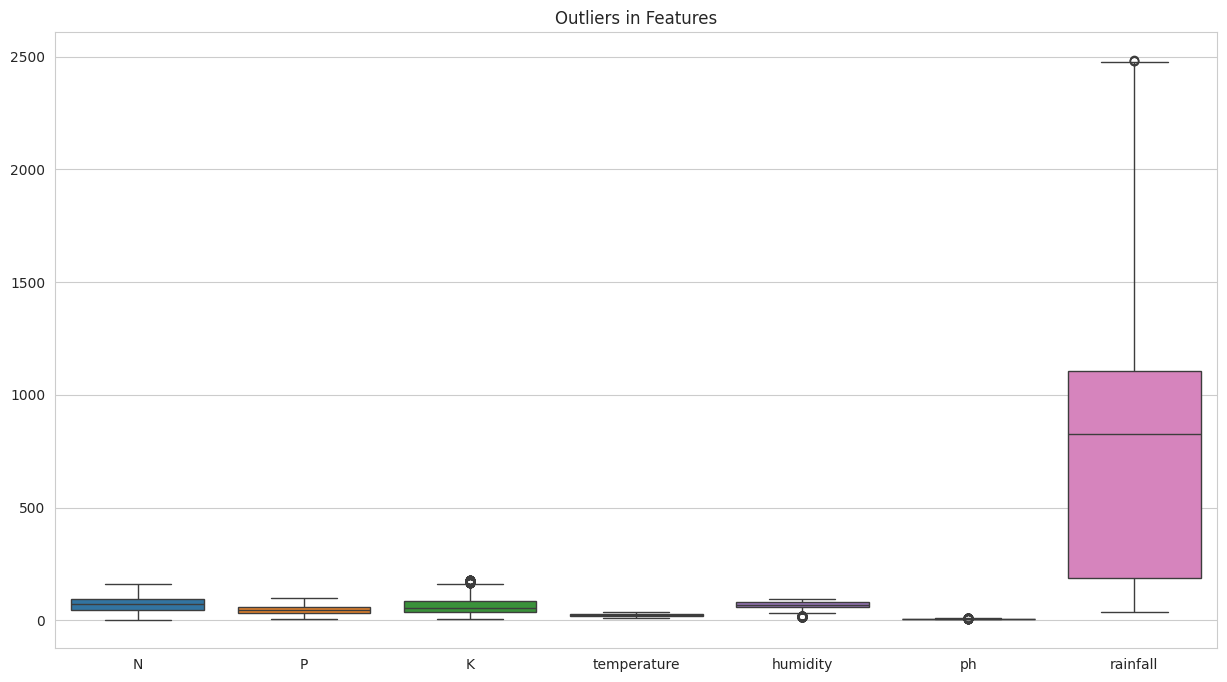

                 N            P            K  temperature     humidity  \
count  3550.000000  3550.000000  3550.000000  3550.000000  3550.000000   
mean     71.677746    45.841408    64.740563    23.398501    67.867411   
std      33.193989    19.598188    36.587294     5.631573    15.439900   
min       0.000000     5.000000     5.000000    10.010000    14.260000   
25%      46.000000    31.000000    36.000000    19.072500    59.552500   
50%      71.000000    44.000000    56.000000    23.635000    69.115000   
75%      96.000000    59.000000    87.000000    27.360000    79.190000   
max     160.000000   100.000000   180.000000    35.990000    94.960000   

                ph     rainfall  
count  3550.000000  3550.000000  
mean      6.562834   768.665166  
std       0.724264   510.160947  
min       4.500000    35.030000  
25%       6.070000   186.315000  
50%       6.510000   827.900000  
75%       7.040000  1103.255000  
max       9.000000  2483.410000  


In [16]:
# Outliers check (boxplot all features)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[features])
plt.title('Outliers in Features')
plt.savefig('../reports/figures/outliers.png')
plt.show()

# Summary stats
print(df[features].describe())